# Programmation Python 3 - Les fichiers

## Présentation

Les programmes réalisés dans les chapitres précédents ne traitaient qu'une quantité minime de données. Ces données étaient d'ailleurs directement intégrées dans le corps du programme au travers de variables comme des entiers, des chaînes de caractères ou même des listes.  

Comment procéder lorsque la quantité de données à traiter est beaucoup plus importante ? Ou alors que nous souhaitons stocker et sauvegarder de manière pérenne ces informations ? 

## Accès aux fichiers

Un fichier, quel qu'il soit (texte, image, son, ...) contient des données et est enregistré sur un disque dur, une clef USB ou tout autre support. 
Les fichiers sont organisés selon une structure en arborescence dans laquelle un noeud peut être soit un fichier soit un dossier appelé aussi répertoire. 
![Exemple image arborescence](https://www.ledito.me/images/documents/2019/11/arborescence_dossiers_fichiers.png)

Tous les systèmes d'exploitation suivent le même principe, toutefois il existe quelques différences d'organisation comme par exemple le système Windows utilise un système de fichiers multi-têtes (il peut exister plusieurs disques racines comme le disque C:, le disque D:, ...) tandis que les systèmes MacOS ou Linux/Unix utilisent un système mono-tête c'est-à-dire une seule racine `/`. 

- Sous Windows c'est le caractère \ qui est utilisé pour séparer les composants d'un chemin.  
    Exemple: `C:\home\chrichri\Documents\Digicomp\Python\les_fichiers.ipynb`  

- Sous MacOs ou -nix c'est le caractère `/` qui est utilisé.  
    Exemple: `/home/chrichri/Documents/Digicomp/Python/les_fichiers.ipynb`  

De plus, le système de fichiers de Windows n'est pas sensible à la casse au contraire des systèmes MacOs ou Linux/Unix. 

Pour accéder à un fichier, il est nécessaire de connaître son nom mais également la localisation, c’est-à-dire où il se situe dans le support sur lequel il est enregistré. On distingue deux types de chemins d'accès à un fichier :  
- Chemin relatif qui prend en compte l'emplacement de lecture c'est-à-dire la plupart du temps le dossier courant. 
- Chemin absolu qui est le chemin complet depuis la racine. 

Pour illustrer ces deux types de chemin d'accès, reprenons la structure en arborescence présentée précédemment. 
![Exemple image arborescence](https://www.ledito.me/images/documents/2019/11/arborescence_dossiers_fichiers.png)


Si le dossier courant aussi appelé dossier de lecture est le dossier `DossierD` et que depuis ce dossier l'objectif est d'utiliser le fichier nommé `FichierD` (qui se situe dans le dossier `DossierC`). Les deux chemins possibles d'accès seront alors:  
- ***Chemin relatif***: il est nécessaire depuis le dossier `DossierD` de "remonter" au dossier `DossierB` puis de nouveau "remonter" au dossier `DossierA` puis ensuite aller dans le dossier `DossierC`. La commande permettant de "remonter" est `..` , ainsi, nous obtiendrons le chemin relatif suivant `..\..\DossierC\FichierD` (Sous Windows) ou `../../DossierC/DichierD` (sous MacOS ou linux/Unix).  
- ***Chemin absolu*** qui est le chemin complet depuis la racine serait donc `DossierA\DossierC\FichierD` (sous Windows) ou `DossierA/DossierC/FichierD` (sous MacOS ou linux/Unix).  


Pour assurer la portabilité de votre projet il est essentiel de bien organiser votre espace de travail (en créant notamment un dossier parent de votre projet et contenant tous les dossiers et fichiers incluent dans votre projet) tout en privilégiant l'utilisation de ***chemins relatifs*** plutôt que des chemins absolus, la raison est simple et est directement liée au fait que chaque individu possède sa propre organisation de travail sur la ou les machine sur lesquelles il travaille.  

Pour connaître le répertoire de travail, aussi appelé dossier ou répertoire courant, il existe une méthode nommée `getcwd()` dans le module `os`. La syntaxe d'utilisation de cette méthode est présentée ci-dessous : 


In [11]:
#Exemple de syntaxe d'une méthode pour connaître le répertoire de travail
import os

print(os.getcwd())

/home/chrichri/Documents/Digicomp/Python


Pour gérer les fichiers dans votre script Python, il y a 3 étapes essentielles à respecter : 
1. **Ouverture du fichier**
2. **Traitement du fichier**
3. **Fermeture du fichier**

L'utilisation d'un fichier ressemble à l'utilisation d'un livre. Pour utiliser le livre, vous devez d'abord le trouver (à l'aide de son titre), puis l'**ouvrir**. Lorsque vous avez fini de l'utiliser, vous le **refermez**. Tant qu'il est ouvert, vous pouvez y **lire** des informations, et vous pouvez aussi y **écrire** des annotations, mais généralement vous ne faites par les deux à la fois ([Source: paragraphe 11-B Travailler avec des fichiers](https://python.developpez.com/cours/apprendre-python3/?page=page_11))

## Ouverture de fichier

La fonction *open()* permet de récupérer un descripteur de fichier en passant en paramètre le chemin d'accès à ce fichier ainsi que le mode d'ouverture. Ces deux paramètres sont tous deux des chaînes de caractères 

In [12]:
#Exemple syntaxe d'écriture de l'instruction open()
mon_fichier = open("NomFichier", mode="Mode_a_preciser")

ValueError: invalid mode: 'Mode_a_preciser'

Il existe différents modes d'ouverture d'un fichier :

| Mode | Description                                                |
|------|------------------------------------------------------------|
| r    | Ouverture en lecture (mode par défaut si pas de précision) |
| w    | Ouverture en écriture (écrase le contenu existant)         |
| x    | Ouverture uniquement pour création                         |
| +    | Ouverture en lecture et écriture                           |
| a    | Ouverture en écriture pour ajout au contenu existant       |
| b    | Fichier binaire                                            |
| t    | Fichier texte (mode par défaut si pas de précision         |

L'arborescence de travail est la suivante: 
- Le chemin absolu du dossier courant est: /home/chrichri/Bureau

Le dossier "Bureau" contient les éléments suivants: 

```
total 410540
drwxr-xr-x   2 chrichri chrichri      4096 oct.   1 21:27  ./
drwxr-xr-x 146 chrichri chrichri     12288 oct.   5 22:58  ../
-rw-rw-r--   1 chrichri chrichri  12386160 févr. 20  2023  350693586_2021_fv1.xlsm
-rwxrwxr-x   1 chrichri chrichri 183123036 sept.  9  2023  arduino-ide_2.2.1_Linux_64bit.AppImage*
-rw-rw-r--   1 chrichri chrichri       561 mars  10  2024 'Conf mail.txt'
-rw-rw-r--   1 chrichri chrichri    121269 oct.   4  2022 'Covid-19, une aide financière pour vous et vos salariés.pdf'
-rw-rw-r--   1 chrichri chrichri      5129 févr. 17  2023  dev-oauth
-rw-rw-r--   1 chrichri chrichri    190713 juil.  7  2023 'Documents scannés.pdf'
-rw-rw-r--   1 chrichri chrichri        69 avril 17 01:54  doom.sh
-rwxrwxr-x   1 chrichri chrichri  61842624 juin  29 12:09  electrum-4.5.5-x86_64.AppImage*
-rw-rw-r--   1 chrichri chrichri    116498 oct.   4  2022 'Embarquez vos salariés.pdf'
-rw-rw-r--   1 chrichri chrichri       742 sept. 26  2022  FileZilla.xml
-rw-rw-r--   1 chrichri chrichri      9363 oct.  23  2022 'FIX mod function'
-rw-rw-r--   1 chrichri chrichri    939198 avril 14 15:59 'Foostrap drake starboard - 1464.html'
-rw-rw-r--   1 chrichri chrichri      5834 juil.  3  2023 'IN DATA indexes.txt'
-rw-rw-r--   1 chrichri chrichri       173 juin  29 12:10 'Ledger adresse.txt'
-rwxr-xr-x   1 chrichri chrichri 161481716 oct.   1 21:06  ledger-live-desktop-2.87.0-linux-x86_64.AppImage*
-rw-rw-r--   1 chrichri chrichri        88 mars  15  2023  .~lock.350693586_2021_fv1.xlsm#
-rw-rw-r--   1 chrichri chrichri        88 juin  26 10:34  .~lock.lookup.ods#
-rw-rw-r--   1 chrichri chrichri      9370 juin  26 10:34  lookup.ods
-rw-rw-r--   1 chrichri chrichri     65583 juil.  7  2023 'MANDAT DE PRELEVEMENT SEPA.PDF.pdf'
-rw-rw-r--   1 chrichri chrichri       212 sept. 29  2022  ocr_speed.txt
-rw-rw-r--   1 chrichri chrichri      1195 sept. 29  2022 'Scaleway connexion.txt'
-rw-rw-r--   1 chrichri chrichri       125 sept.  6  2022  TODO
```
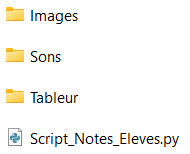

Exemple des 3 modes textuels de manipulation du fichier "employee.csv" contenu dans le dossier "Python":

In [13]:
#Exemple d'ouverture du fichier employee.csv depuis le dossier courant
#Ouverture en mode lecture
mon_fichier_lecture = open('./employee.csv', mode='r')
#Ouverture en mode écriture (!!! Contenu existant écrasé)
mon_fichier_ecriture = open('./employee.csv', mode='w')
#Ouverture en mode écriture (ajout à la suite du contenu existant)
mon_fichier_ajout = open('./employee.csv', mode='a')

En plus des modes textuels, il est possible d'ouvrir un fichier en mode binaire en rajoutant `b` au mode. Voir https://docs.python.org/3/library/io.html#binary-i-o pour plus d'informations.

## Fermeture de fichier

Une fois que vous avez ouvert le fichier désiré dans le mode souhaité et créé un descripteur du fichier (dans l'exemple ci-dessus 3 descripteurs ont été créés à savoir "mon_fichier_lecture", "mon_fichier_ecriture" et "mon_fichier_ajout", vous pouvez fermer le fichier utilisé). Pour fermer un fichier il suffit d'utiliser l'instruction `close()` en précisant le descripteur concerné.  
Il est essentiel de ne pas oublier cette étape de fermeture du fichier car elle garantit:

- La libération de la ressource pour qu'elle puisse être utilisée par un autre processus
- La finalisation de la modification du fichier
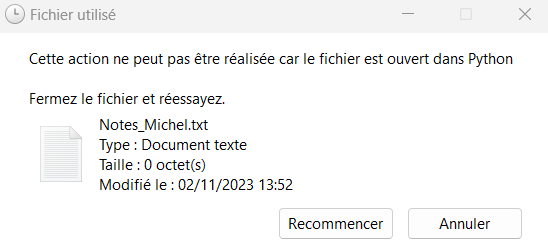

In [14]:
#Exemple de fermeture de fichier
mon_fichier_lecture.close()
mon_fichier_ecriture.close()
mon_fichier_ajout.close()

Il existe un  mot-clé nommé *with* fournit par Python qui permet d'éviter tou problème en cas d'oubli d'utilisation de la méthode *close()*. 


In [15]:
#Syntaxe d'utilisation du mot-clé with
with open("NomFichier", mode="Mode_a_preciser") as mon_fichier_lecture:
    instruction1
    instruction2
    instruction3
    ...

ValueError: invalid mode: 'Mode_a_preciser'

`with` appelle automatiquement la méthode `close()` du descripteur de fichier à la sortie du bloc.
C'est un *contexte* d'exécution qui permet de garantir que les ressources seront libérées à la fin de l'exécution du bloc.

## Traitement de fichier

### Lecture 

Il existe plusieurs instructions permettant de lire le contenu d'un fichier. 
- La première méthode `read()` permet d'obtenir le contenu du fichier dans une chaîne de caractères. Lors de l'utilisation de la méthode `open()` si aucun mode n'est précisé dans les paramètres de la méthode le fichier sera alors ouvert en **lecture**. 

In [ ]:
#Exemple d'ouverture et lecture de fichier sous forme de str
with open('./README.md') as mon_fichier_lecture:
    contenu_fichier = mon_fichier_lecture.read()
print(contenu_fichier)

L'affichage réalisé dans le terminal sera le même que celui du fichier lu en incluant les caractères comme les tabulations, les retours à la ligne, ...  

Il est possible de remplacer ces caractères spéciaux par le caractère de votre choix par l'intermédiaire de la méthode `replace()`. Le premier paramètre de cette méthode est le caractère que l'on souhaite remplacer, et le second paramètre correspond au caractère qui remplacera le caractère visé.  
Dans l'exemple du fichier "README.md" chaque information est présentée sur une ligne différente, vous pouvez les rassembler sur une seule et même ligne d'un point de vu de l'affichage comme présenté dans l'exemple ci-dessous : 

In [16]:
#Exemple d'ouverture et lecture de fichier sous forme de str
with open('./README.md') as mon_fichier_lecture:
    contenu_fichier = mon_fichier_lecture.read().replace('\n', ' ')
print(contenu_fichier)

# Introduction à la programmation Python («PYTHON»)  ## Objectifs  * Connaître les termes, concepts et syntaxe de Python * Développer des applications avec Python en utilisant les modules de bibliothèque standards  ## Contenu  1. Qu'est-ce que Python ? 2. Premiers pas     * Opérations arithmétiques     * Premier programme     * Enregistrer et exécuter 3. Bases de la programmation     * Variables et opérateurs     * Branchements     * Boucles     * Erreurs et exceptions     * Fonctions 4. Types de données     * Nombres     * Strings     * Listes     * Dictionnaires     * Ensembles (Sets) 5. Programmation avancée     * Sortie et mise en forme     * Erreurs et exceptions     * Fonctions     * Modules propres     * Les paramètres de la ligne de commande 6. Différents modules     * Date et heure     * Expressions régulières     * Charger des nouveaux modules 7. Fichiers     * Décrire des fichiers     * Lecture des fichiers 8. InternetLire des pages web     * Copier des pages web     * Envoy

- La seconde méthode `readlines()` permet d'obtenir le contenu du fichier dans un tableau, à savoir une liste. Cette méthode n'est utilisable que si le fichier à lire n'est pas trop volumineux car c'est l'intégralité de son contenu qui est copié dans une variable de type liste donc dans la mémoire vive de la machine utilisée. Chaque élément de ce tableau correspond à une ligne lue dans le fichier visé tout en intégrant les caractères spéciaux. La méthode `replace()` précédemment vue n'est pas applicable dans ce cas, car inutilisable sur une donnée de type liste. 

In [17]:
#Exemple d'ouverture et lecture de fichier sous forme de liste
with open('./README.md') as mon_fichier_lecture:
    contenu_fichier = mon_fichier_lecture.readlines()
print(contenu_fichier)

['# Introduction à la programmation Python («PYTHON»)\n', '\n', '## Objectifs\n', '\n', '* Connaître les termes, concepts et syntaxe de Python\n', '* Développer des applications avec Python en utilisant les modules de bibliothèque standards\n', '\n', '## Contenu\n', '\n', "1. Qu'est-ce que Python ?\n", '2. Premiers pas\n', '    * Opérations arithmétiques\n', '    * Premier programme\n', '    * Enregistrer et exécuter\n', '3. Bases de la programmation\n', '    * Variables et opérateurs\n', '    * Branchements\n', '    * Boucles\n', '    * Erreurs et exceptions\n', '    * Fonctions\n', '4. Types de données\n', '    * Nombres\n', '    * Strings\n', '    * Listes\n', '    * Dictionnaires\n', '    * Ensembles (Sets)\n', '5. Programmation avancée\n', '    * Sortie et mise en forme\n', '    * Erreurs et exceptions\n', '    * Fonctions\n', '    * Modules propres\n', '    * Les paramètres de la ligne de commande\n', '6. Différents modules\n', '    * Date et heure\n', '    * Expressions régulièr

- La troisième méthode `readline()` permet d'obtenir le contenu ligne par ligne du fichier dans une chaîne de caractères. En effet la méthode `readline()` ne lit qu'une ligne à la fois en incluant le caractère spécial de fin de ligne. Pour supprimer ce caractère de retour à la ligne il est possible d'utiliser la méthode `rstrip()` (méthode qui permet de supprimer les derniers caractères d'une chaîne de caractères). 

In [18]:
#Exemple d'ouverture et lecture de fichier sous forme de str en supprimant \n
with open('./README.md') as mon_fichier_lecture:
    contenu_fichier = mon_fichier_lecture.readline().rstrip()
print(contenu_fichier)

# Introduction à la programmation Python («PYTHON»)


Pour lire l'intégralité du fichier avec la méthode `readline()` il est nécessaire de créer une boucle afin de répéter la méthode autant de fois qu'il y a de ligne dans le fichier. En réalité cela revient à lire le fichier tant que nous ne sommes pas arrivés à la fin de ce document. 

In [19]:
#Exemple d'ouverture et lecture intégrale de fichier sous forme de str
with open('./README.md') as mon_fichier_lecture:
    contenu_fichier = mon_fichier_lecture.readline().rstrip()
    while contenu_fichier != '':
        print(contenu_fichier)
        contenu_fichier = mon_fichier_lecture.readline().rstrip()

# Introduction à la programmation Python («PYTHON»)


Une syntaxe plus simple et présenté ci-dessous permet également de lire l'intégralité d'un fichier au travers d'une simple boucle itérative. 

In [20]:
#Exemple d'ouverture et lecture intégrale de fichier sous forme de str
with open('./README.md') as mon_fichier_lecture:
    for ligne in mon_fichier_lecture:
        print(ligne.rstrip())

# Introduction à la programmation Python («PYTHON»)

## Objectifs

* Connaître les termes, concepts et syntaxe de Python
* Développer des applications avec Python en utilisant les modules de bibliothèque standards

## Contenu

1. Qu'est-ce que Python ?
2. Premiers pas
    * Opérations arithmétiques
    * Premier programme
    * Enregistrer et exécuter
3. Bases de la programmation
    * Variables et opérateurs
    * Branchements
    * Boucles
    * Erreurs et exceptions
    * Fonctions
4. Types de données
    * Nombres
    * Strings
    * Listes
    * Dictionnaires
    * Ensembles (Sets)
5. Programmation avancée
    * Sortie et mise en forme
    * Erreurs et exceptions
    * Fonctions
    * Modules propres
    * Les paramètres de la ligne de commande
6. Différents modules
    * Date et heure
    * Expressions régulières
    * Charger des nouveaux modules
7. Fichiers
    * Décrire des fichiers
    * Lecture des fichiers
8. InternetLire des pages web
    * Copier des pages web
    * Envoy

Donc en résumé `readline` retourne une chaine de caractères alors que `readlines` retourne une liste de chaines de caractères, une par ligne. 


#### ***Exercice 1***

À partir du fichier nommé "README.md" créer un script Python appelé `chapter.py` qui prend un numéro de charpitre en argument et affiche le contenu de ce chapitre. 

1. Attention aux commentaires
2. Attention aux docstring si vous créez une ou des fonctions
3. Attention aux noms de variables.  

*Faites valider votre script ainsi que son exécution.* 
***

### Écriture

Tout comme pour lire il existe plusieurs méthodes permettant d'écrire dans un fichier que cela soit en mode `w` ou en mode `a`.  

- La première méthode est `write()` qui permet d'écrire une ligne dans un fichier. À l'instar de la méthode *readline()* pour la lecture, si vous désirez écrire plusieurs lignes dans un fichier il faudra alors créer une boucle itérative afin de répéter l'opération.  

L'exemple ci-dessous, présente un exemple d'ajout de données dans le fichier "README.md".  

In [21]:
#Exemple d'ouverture et écriture dans un fichier sous forme de str
with open('./README.md', mode='a') as mon_fichier_ecriture:
    mon_fichier_ecriture.write('\n12. Les LLM')

Si on souhaite écrire plusieurs lignes dans le fichier il faut alors créer une boucle itérative comme présenté ci-dessous: 

In [22]:
#Exemple d'ouverture et écriture dans un fichier sous forme de str
with open('./README.md', mode='a') as mon_fichier_ecriture:
    for i in range(2):
        mon_fichier_ecriture.write(f'\n{11 + i}. Un super chapitre !')

Dans l'exemple ci-dessus, l'écriture des données est réalisée deux fois consécutivement. On ajoute à chaque fois un numéro de chapitre différent dans la boucle et on écrit une ligne de plus grâce au `\n`.

- Il est également possible d'utiliser la méthode `writelines()` qui permet d'écrire plusieurs lignes, ce qui est équivalent à utiliser la méthode `write()` dans une boucle itérative.  

L'exemple ci-dessous vous présente comment écrire plusieurs lignes dans un fichier sans utiliser de boucle itérative. 

In [23]:
#Exemple d'ouverture et écriture de plusieurs lignes dans un fichier
data = ['\n12. Testing', '\n13. LLM']
with open('./README.md', mode='a') as mon_fichier_ecriture:
    mon_fichier_ecriture.writelines(data)

À noter que le caractère de fin de ligne est ajouté à la main dans le script à la fois avec la méthode `write()` et la méthode `writelines()`. Revoir le cours nommé "6_types_iterables.ipynb" pour retrouver les différents caractères spéciaux utilisables.  

***
#### ***Exercice 2***

***Le juste prix***  
L'ordinateur choisit aléatoirement un prix entre 30 € et 100 € compris (que des valeurs entières). 
L'utilisation (joueur) doit trouver la valeur en un minimum d'essais. 
À chaque proposition du joueur, un message s'affichera: 
- C'est plus !
- C'est moins ! 
- Vous avez gagné ! 
- Vous avez perdu !

Le nombre de tentatives déjà réalisés doit s'afficher.  
10 propositions au maximum sont possibles pour le joueur, au-delà, il a perdu.
Après 5 essais inclus, un message d'alerte doit apparaître.  
À la fin de la partie, le joueur a la possibilité de rejouer ou non.  

Dans un fichier texte (.txt) nommé "resultats_juste_prix.txt", vous devez:
- Stocker le nombre de parties jouées lors de l'exécution du script
- Le nombre d'essais moyen nécessaire pour trouver le juste prix (cette valeur est directement liée au nombre de parties jouées)
- Le pourcentage de réussite ou d'échec par rapport au nombre de parties jouées  

*Exemple*: première exécution du jeu, je fais 3 parties dont 1 seule a été un échec, les deux parties gagnées l'ont été en 3 coups et 7 coups.  
* Nombre de parties: 3  
* Nombre d'essais moyen: 5
* Pourcentage de réussite: 66,66666%

Si le script est de nouveau executé, une autre ligne sera alors renseignée et saisie dans le fichier à la suite de celle existante. 


1. Attention aux commentaires
2. Attention aux docstring si vous créez une ou des fonctions
3. Attention aux noms de variables.  

*Faites valider votre script ainsi que son exécution.* 
***
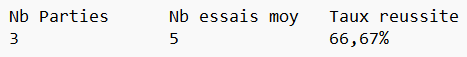

## Les fichiers CSV

Un fichier CSV (Comma Separated Values) est un document numérique servant de base de données, sans formatage particulier. Chaque champ de données est séparé du suivant par une virgule ou un point-virgule. Les fichiers CSV servent de format universel permettant de voir les données dans une variété d'applications.  
Les données mises à disposition sur le site https://www.data.gouv.fr/fr/ sont notamment proposées au format CSV. Pour mettre en forme les données présentes dans un fichier CSV il est nécessaire d'utiliser une application dédiée, un tableur, comme peuvent l'être *Excel*, *OpenOffice Calc*, ...  
La plateforme *data.gouv.fr* est le portail unique interministériel destiné à rassembler et à mettre à disposition librement l'ensemble des informations publiques de l'état, de ses établissements publics administratifs, des collectivités territoriales et des personnes de droit public ou de droit privé chargées d'une mission de service public.  

Pour manipuler (lecture et/ou écriture) les fichiers CSV en Python il est nécessaire d'utiliser des méthodes définies dans le module *csv*.  

Ci-dessous un exemple de script permettant de lire les données d'un fichier CSV:

In [24]:
#Exemple de lecture d'un fichier CSV
import csv

with open('/home/chrichri/Documents/Digicomp/Linux-2/employee.csv') as fichier_csv_lecture:
    donnees = csv.reader(fichier_csv_lecture, quotechar='"', delimiter=';')
    for ligne in donnees:
        print(ligne)

['id', 'name', 'age', 'salary', 'dept_id']
['0', 'John', '30', '1000', '0']
['1', 'Jane', '25', '1500', '0']
['2', 'Doe', '35', '2000', '1']
['3', 'Steeve', '40', '2000', '0']
['4', 'Smith', '40', '2500', '1']
['5', 'Brown', '45', '3000', '2']


Suite à l'exécution du script présenté ci-dessus, chaque ligne lue est présentée sous forme de tableau (liste) contenant une liste représentant les colonnes.
Si la liste de listes n'est pas correctement formatée, vérifier les arguments passés à la méthode *reader()* et notamment le délimiteur utilisé.

***
#### ***Exercice 3***  

**Trouver** sur le site de l'INSEE, à l'adresse https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511, le document au format CSV répertoriant toutes les communes de France et Populations associées.  
Le document à trouver se présente de la manière suivante:

![Population française](./doc/image/pop-france.png)
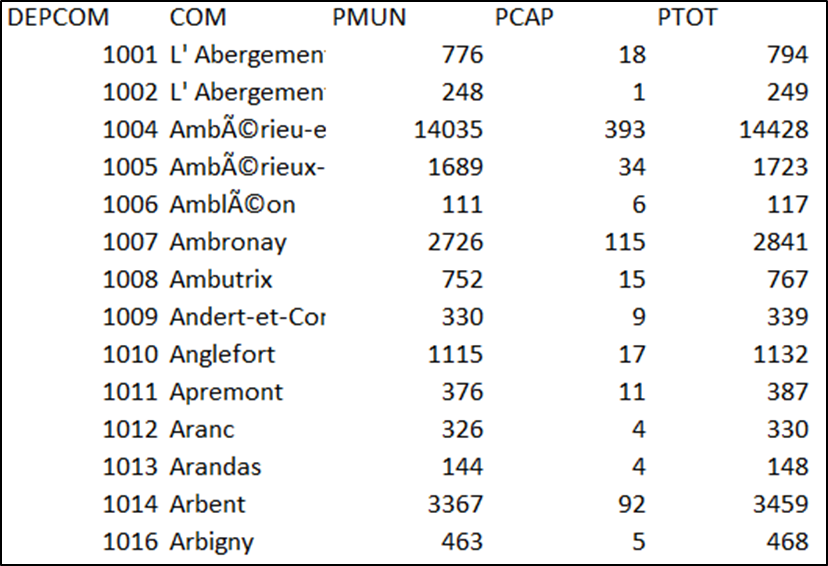

Chaque colonne de ce document correspond à: 
- DEPCOM: Code commune
- COM: Nom de commune
- PMUN: Population municipale
- PCAP: Population comptée à part
- PTOT: Population totale (= PMUN + PCAP)  

Une fois que vous serez en possession de ce document, vous devez:
1. Écrire un script Python qui afficher la population de la ville de Toulouse
2. Écrire un script Python qui affiche la commune ayant le moins d'habitants en France
3. Écrire un script Python qui affiche la commune ayant le plus d'habitants en France
4. Écrire un script Python qui affiche la population d'une commune renseignée par l'utilisateur. 

- Attention aux commentaires
- Attention aux docstring si vous créez une ou des fonctions
- Attention aux noms de variables.  

*Faites valider votre script ainsi que son exécution.* 
***

Il est également possible d'écrire dans un fichier CSV par l'intermédiaire de méthodes définies également dans le module `csv`. Il existe deux principales méthodes qui sont `writerow()` qui permet d'écrire une seule ligne (souvent utilisée pour les en-têtes) et `writerows()` qui permet d'écrire plusieurs lignes dans le fichier CSV. 

L'exemple ci-dessous présente un script permettant d'écrire des données dans un fichier CSV: 

In [25]:
#Exemple d'écriture dans un fichier CSV
import csv

with open('/home/chrichri/Documents/Digicomp/Python/employee.csv', mode='w') as fichier_csv_ecriture:
    donnees = csv.writer(fichier_csv_ecriture, delimiter=';')
    donnees.writerow(['12', 'Janis', '25', '1500', '1'])
    donnees.writerows([['14', 'Hervé', '23', '1500', '1'], ['15', 'David', '27', '1500', '1']])

***
#### ***Exercice 4***  

Écrire un script Python permettant d'ajouter un *Code commune*, le nom d'une commune, une valeur de population municipale, une valeur de population comptée à part et une valeur de population totale dans le fichier CSV que vous vez traité dans l'exercice précédent. 

- Attention aux commentaires
- Attention aux docstring si vous créez une ou des fonctions
- Attention aux noms de variables.  

*Faites valider votre script ainsi que son exécution.* 
***
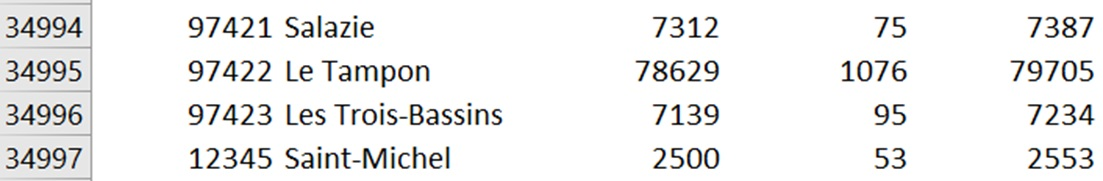
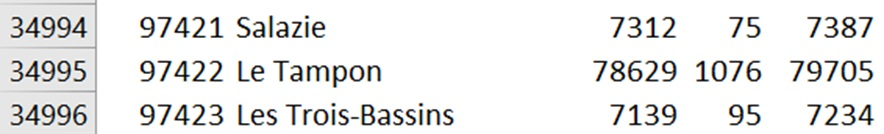